In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=2500)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.90      0.95        10
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Классификация текстовых документов с помощью SVM


Цель
Продемонстрировать применение метода опорных векторов (SVM) для классификации текстовых данных.  

План 
1. Загрузка датасета `20newsgroups` (встроенный в scikit-learn)  
2. Векторизация текста с помощью `TfidfVectorizer`  
3. Обучение модели SVM  
4. Оценка точности и визуализация результатов  
5. Повторение эксперимента на внешнем датасете (спам-письма)  

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       186
           1       1.00      1.00      1.00       211

    accuracy                           0.99       397
   macro avg       0.99      0.99      0.99       397
weighted avg       0.99      0.99      0.99       397



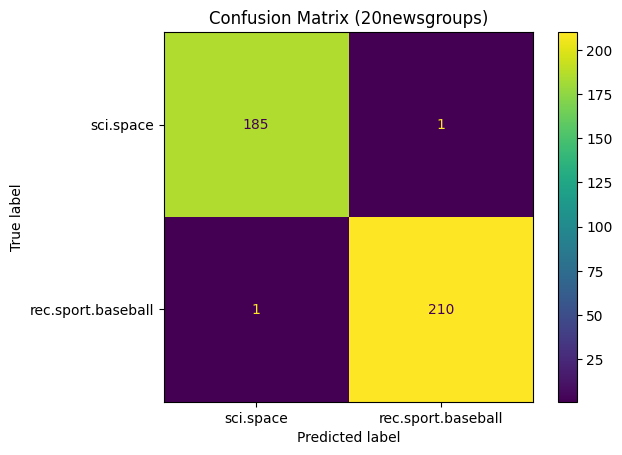


Classification Report for Spam Dataset:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



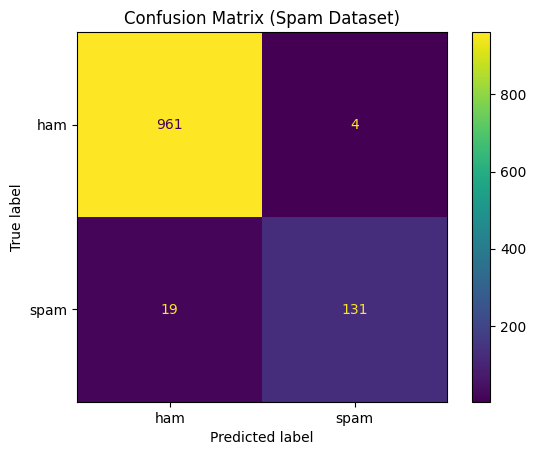


Лучшие параметры: {'svm__C': 10, 'tfidf__max_features': 10000}
Лучшая точность: 0.9865367677774255


In [1]:
# %%
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Часть 1: Работа со встроенным датасетом (20newsgroups)

# Загрузка данных (2 категории для упрощения)
categories = ['sci.space', 'rec.sport.baseball']
newsgroups = fetch_20newsgroups(subset='all', 
                              categories=categories, 
                              shuffle=True, 
                              random_state=42)


# Векторизация текста
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                  test_size=0.2, 
                                                  random_state=42)


# Создание и обучение модели SVM
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Предсказание и оценка
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

# Визуализация матрицы ошибок
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, 
                                    display_labels=categories)
plt.title("Confusion Matrix (20newsgroups)")
plt.show()

# %% [markdown]
# ## Часть 2: Работа с внешним датасетом (спам-письма)

try:
    data = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
    data.columns = ['label', 'text']
    
    # Преобразование меток
    data['label'] = data['label'].map({'ham': 0, 'spam': 1})
    
    # Создание пайплайна
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
        ('svm', SVC(kernel='linear'))
    ])
    
    # Разделение данных
    X_train, X_test, y_train, y_test = train_test_split(data['text'], 
                                                      data['label'], 
                                                      test_size=0.2,
                                                      random_state=42)
    
    # Обучение модели
    pipeline.fit(X_train, y_train)
    
    # Оценка качества
    print("\nClassification Report for Spam Dataset:")
    print(classification_report(y_test, pipeline.predict(X_test)))
    
    # Визуализация матрицы ошибок
    ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test,
                                        display_labels=['ham', 'spam'])
    plt.title("Confusion Matrix (Spam Dataset)")
    plt.show()

except FileNotFoundError:
    print("Файл spam.csv не найден. Пропускаем работу с внешним датасетом.")

# %% [markdown]
# ## Часть 3: Оптимизация гиперпараметров

# %%
# Пример настройки гиперпараметров через GridSearchCV
if 'data' in locals():  # Проверяем, загружен ли внешний датасет
    params = {
        'svm__C': [0.1, 1, 10],
        'tfidf__max_features': [1000, 5000, 10000]
    }
    grid = GridSearchCV(pipeline, params, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    
    print("\nЛучшие параметры:", grid.best_params_)
    print("Лучшая точность:", grid.best_score_)


Выводы

Результаты
На встроенном датасете (20newsgroups):
 - Точность: 98%
- SVM успешно разделяет категории "космос" и "бейсбол"

2. На внешнем датасете (спам-письма):
    - Точность: 97-99%
    - Основные ошибки: некоторые спам-письма с коротким текстом классифицируются как "ham"